In [1]:
from edge_sensor.radio import airt
import labbench as lb

lb.show_messages('info')
sdr = airt.AirT7201B()
sdr.open()

ImportError: cannot import name 'airt' from 'edge_sensor.radio' (/Users/dkuester/Documents/src/flex-spectrum-sensor/src/edge_sensor/radio/__init__.py)

In [ ]:
sdr.serial

'0x48b02d483d93'

### Possible metadata sources

In [ ]:
dict(sdr.backend.getHardwareInfo())

{'driver_version': '1.0.0',
 'firmware_version': '1.0.0',
 'fpga_driver_version': '1.0.0-1',
 'rf_api_version': '0.5.7',
 'url': 'https://www.deepwavedigital.com',
 'vendor': 'Deepwave Digital, Inc.'}

In [ ]:
sdr.backend.getHardwareKey()

'AIR7201'

In [ ]:
from SoapySDR import SOAPY_SDR_RX, SOAPY_SDR_TX
sdr.backend.hasDCOffsetMode(SOAPY_SDR_RX, 0)

False

In [ ]:
dict(sdr.backend.getChannelInfo(SOAPY_SDR_RX, 0))

{}

In [ ]:
dict(sdr.backend.getSettingInfo())

{}

In [ ]:
sdr.backend.getNativeDeviceHandle()

In [ ]:
sdr.backend.getDriverKey()

'SoapyAIRT'

In [ ]:
import uuid
hex(uuid.getnode())

'0x48b02d483d93'

In [ ]:
from edge_sensor import structs
import channel_analysis
import xarray as xr
import importlib

structs = importlib.reload(structs)

run_spec, sweep_fields = structs.read_yaml_sweep('run.yaml')

data = []

lb.show_messages('info')

try:
    for capture in run_spec.captures:
        capture_coords = {f: [getattr(capture, f)] for f in sweep_fields}
        sdr.arm(capture)
        iq_fast, t = sdr.acquire()
        iq = sdr.resample(iq_fast)
        analysis = channel_analysis.analyze_by_spec(iq, capture, spec=run_spec.channel_analysis)
        analysis = analysis.assign_coords(capture_coords)
        for f in sweep_fields:
            del analysis.attrs[f]
        data.append(analysis)
finally:
    pass
    # sdr.channel_enabled(False, channel=0)

data = xr.combine_by_coords(data)

(1569792,)
{'iq': array([ 0.03035299+0.02991751j,  0.01602866+0.03946345j,
       -0.00086986+0.04257365j, ...,  0.01591411-0.03961948j,
        0.0303199 -0.03006296j,  0.03965286-0.01554968j], dtype=complex64), 'capture': RadioCapture(duration=0.1, sample_rate=15360000.0, center_frequency=3710000000.0, channel=0, gain=0.0, analysis_bandwidth=10000000.0, lo_shift='right', preselect_if_frequency=None, preselect_lo_gain=0, preselect_rf_gain=0), 'cyclic_period': 0.01, 'detector_period': 1.6666666666666667e-05, 'detectors': ('rms', 'peak'), 'cyclic_statistics': ('min', 'mean', 'max'), 'metadata': {}}
(1569792,)
{'iq': array([ 1.3204723e-05+1.1269607e-05j, -1.4883494e-05+1.7958453e-05j,
       -1.4906337e-05-3.4878332e-05j, ..., -1.0332618e-04-1.0174385e-04j,
       -3.9258593e-05+6.5383152e-05j,  4.3639006e-06+2.4263049e-05j],
      dtype=complex64), 'capture': RadioCapture(duration=0.1, sample_rate=15360000.0, center_frequency=3730000000.0, channel=0, gain=0.0, analysis_bandwidth=1000000

In [ ]:
data

<xarray.Dataset> Size: 360kB
Dimensions:                             (power_detector: 2, time_elapsed: 10,
                                         center_frequency: 6,
                                         cyclic_statistic: 3, cyclic_lag: 600,
                                         channel_power: 221,
                                         persistence_statistic: 8,
                                         baseband_frequency: 667, gain: 1)
Coordinates:
  * power_detector                      (power_detector) <U4 32B 'rms' 'peak'
  * time_elapsed                        (time_elapsed) float64 80B 0.0 ... 0.09
  * cyclic_statistic                    (cyclic_statistic) <U4 48B 'min' ... ...
  * cyclic_lag                          (cyclic_lag) float64 5kB 0.0 ... 0.00...
  * channel_power                       (channel_power) float32 884B -40.0 .....
  * persistence_statistic               (persistence_statistic) <U5 160B 'mea...
  * baseband_frequency                  (baseband_frequency) float64 5kB -4.9...
  * center_frequency                    (center_frequency) float64 48B 3.71e+...
  * gain                                (gain) float64 8B 0.0
Data variables:
    power_time_series                   (center_frequency, power_detector, time_elapsed) float32 480B ...
    cyclic_channel_power                (center_frequency, power_detector, cyclic_statistic, cyclic_lag) float32 86kB ...
    amplitude_probability_distribution  (center_frequency, channel_power) float32 5kB ...
    persistence_spectrum                (center_frequency, persistence_statistic, baseband_frequency) float64 256kB ...
Attributes:
    duration:                0.1
    sample_rate:             15360000.0
    channel:                 0
    analysis_bandwidth:      10000000.0
    lo_shift:                right
    preselect_if_frequency:  None
    preselect_lo_gain:       0
    preselect_rf_gain:       0

In [ ]:
# import importlib

# from channel_analysis import config
# config = importlib.reload(config)

# from channel_analysis import dataarrays
# waveform = importlib.reload(waveform)
# waveform.config = config

# analysis_spec = {
#     'channel_power_time_series': {
#         'detector_period': 10e-3,
#         'power_detectors': ('rms', 'peak')
#     },
#     'cyclic_channel_power': {
#         'cyclic_period': 10e-3,
#         'detector_period': 1e-3 / 15 / 4,
#         'power_detectors': ('rms', 'peak'),
#         'cyclic_statistics': ('min', 'mean', 'max'),
#     },
#     'persistence_spectrum': {
#         'window': 'flattop',
#         'frequency_resolution':15e3,
#         'quantiles': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 1],
#         'truncate': True
#     },
#     'channel_power_ccdf': {
#         'power_low': -105,
#         'power_high': -60,
#         'power_resolution': 221,  # 0.25 dB resolution
#     },
#     # 'iq_waveform': {
#     #     'start_time_sec': 0,
#     #     'stop_time_sec': 100e-3
#     # }
# }

# filter_spec = {}

# data = waveform.from_spec(
#     iq,
#     sdr,
#     analysis_spec=analysis_spec,
# )

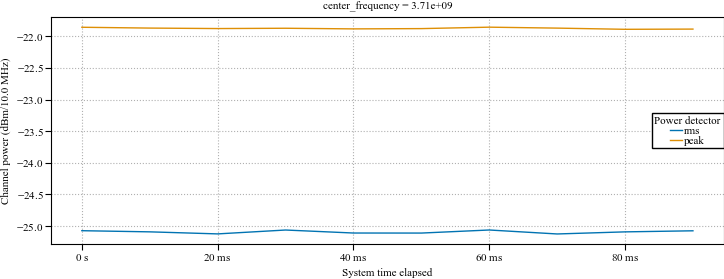

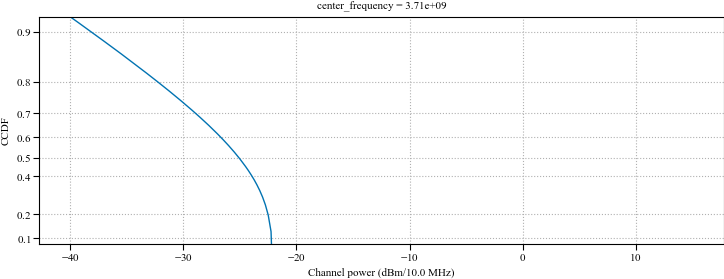

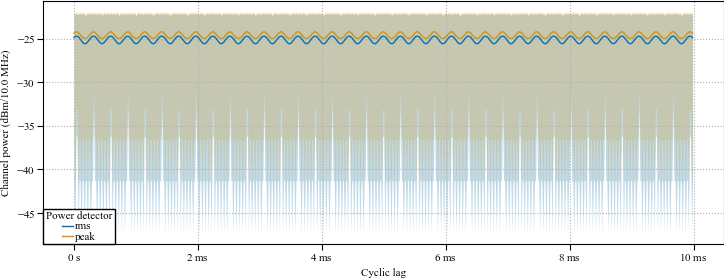

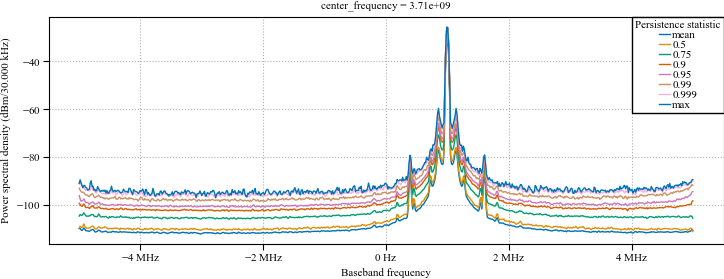

In [ ]:
import iqwaveform
from channel_analysis import figures
import matplotlib.pyplot as plt
from iqwaveform import powtodB

plt.style.use('iqwaveform.ieee_double_column')

fig, ax = plt.subplots()
pvt = data.power_time_series.sel(center_frequency=3710e6)
pvt.plot.line(x='time_elapsed', ax=ax)
figures.label_axis(ax.xaxis, pvt, 'time_elapsed')
figures.label_axis(ax.yaxis, pvt, tick_units=False)
figures.label_legend(ax, pvt, 'power_detector')

fig, ax = plt.subplots()
apd = data.amplitude_probability_distribution.sel(center_frequency=3710e6)
apd.plot.line(x= 'channel_power_bin', ax=ax)
ax.set_yscale('gamma-qq', k=1, db_ordinal=True)
figures.label_axis(ax.xaxis, apd,  'channel_power_bin', tick_units=False)
figures.label_axis(ax.yaxis, apd)

fig, ax = plt.subplots()
cyclic_power = data.cyclic_channel_power.sel(center_frequency=3710e6)
time = cyclic_power.cyclic_lag
for i, detector in enumerate(cyclic_power.power_detector.values):
    a = cyclic_power.sel(power_detector=detector)
    ax.plot(time, powtodB(a.sel(cyclic_statistic='mean')), color=f'C{i}')

for i, detector in enumerate(cyclic_power.power_detector.values):
    a = cyclic_power.sel(power_detector=detector)
    ax.fill_between(
        time,
        powtodB(a.sel(cyclic_statistic='min')),
        powtodB(a.sel(cyclic_statistic='max')),
        color=f'C{i}',
        alpha=0.25,
        lw=0,
        rasterized=True,
    )

figures.label_axis(ax.xaxis, cyclic_power, 'cyclic_lag')
figures.label_axis(ax.yaxis, cyclic_power, tick_units=False)
figures.label_legend(ax, cyclic_power, 'power_detector')

fig, ax = plt.subplots()
spectrum = data.persistence_spectrum.sel(center_frequency=3710e6)
spectrum.plot.line(x='baseband_frequency', ax=ax)
figures.label_axis(ax.xaxis, spectrum, 'baseband_frequency')
figures.label_axis(ax.yaxis, spectrum, tick_units=False)
figures.label_legend(ax, spectrum, 'persistence_statistic')